In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from tensorflow.keras.applications import EfficientNetB0
from keras import callbacks
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


2023-04-27 14:30:47.310143: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-27 14:30:47.310159: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
datagen = ImageDataGenerator()

In [3]:
train_it = datagen.flow_from_directory('/home/pl/Documents/course_work_2/chest_xray/train/', class_mode='binary', batch_size=64)
test_it = datagen.flow_from_directory('/home/pl/Documents/course_work_2/chest_xray/test/', class_mode='binary', batch_size=64)
val_it = datagen.flow_from_directory('/home/pl/Documents/course_work_2/chest_xray/val/', class_mode='binary', batch_size=64)
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 5467 images belonging to 2 classes.
Found 691 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Batch shape=(64, 256, 256, 3), min=0.000, max=255.000


In [4]:
efficient_net = EfficientNetB0(
    weights='imagenet',
    input_shape=(32,32,3),
    include_top=False,
    pooling='max'
)

model = Sequential()
model.add(efficient_net)
model.add(Dense(units = 120, activation='relu'))
model.add(Dense(units = 120, activation = 'relu'))
model.add(Dense(units = 1, activation='sigmoid'))
model.summary()

2023-04-27 14:30:55.783960: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-27 14:30:55.783987: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-27 14:30:55.784009: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pl): /proc/driver/nvidia/version does not exist
2023-04-27 14:30:55.784238: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 dense (Dense)               (None, 120)               153720    
                                                                 
 dense_1 (Dense)             (None, 120)               14520     
                                                                 
 dense_2 (Dense)             (None, 1)                 121       
                                                                 
Total params: 4,217,932
Trainable params: 4,175,909
Non-trainable params: 42,023
_________________________________________________________________


In [5]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

/home/pl/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
history = model.fit_generator(
    generator=train_it,
    epochs = 50,
    steps_per_epoch = 15,
    validation_data = val_it,
    validation_steps = 7
)

/tmp/ipykernel_8815/4263400253.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50


2023-04-27 14:53:09.367989: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.
2023-04-27 14:53:09.570614: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.
2023-04-27 14:53:09.658487: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.
2023-04-27 14:53:09.724347: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.
2023-04-27 14:53:09.793570: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.


15/15 [==============================] - 167s 10s/step - loss: 0.8150 - accuracy: 0.7281 - val_loss: 0.5991 - val_accuracy: 0.6250
Epoch 2/50
15/15 [==============================] - 150s 10s/step - loss: 0.2095 - accuracy: 0.9198
Epoch 3/50
15/15 [==============================] - 144s 10s/step - loss: 0.1369 - accuracy: 0.9438
Epoch 4/50
15/15 [==============================] - 142s 9s/step - loss: 0.1386 - accuracy: 0.9479
Epoch 5/50
15/15 [==============================] - 154s 10s/step - loss: 0.0978 - accuracy: 0.9635
Epoch 6/50
15/15 [==============================] - 141s 9s/step - loss: 0.0951 - accuracy: 0.9615
Epoch 7/50
15/15 [==============================] - 135s 9s/step - loss: 0.0734 - accuracy: 0.9762
Epoch 8/50
15/15 [==============================] - 144s 10s/step - loss: 0.0428 - accuracy: 0.9854
Epoch 9/50
15/15 [==============================] - 141s 9s/step - loss: 0.0534 - accuracy: 0.9823
Epoch 10/50
15/15 [==============================] - 139s 9s/step - loss:

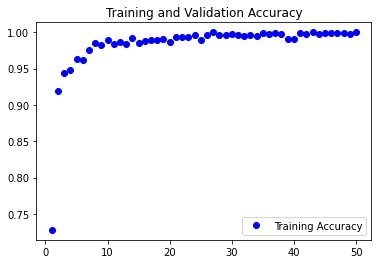

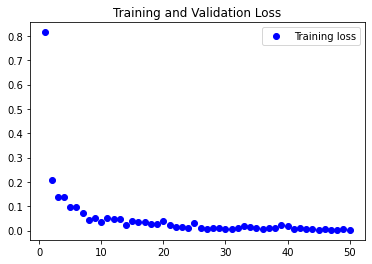

In [25]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label = 'Training Accuracy')
#plt.plot(epochs,val_acc,'b',label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label = 'Training loss')
#plt.plot(epochs,val_loss,'b',label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [22]:
preds = model.predict_generator(
    test_it,
    steps=len(test_it.filenames)
)

/tmp/ipykernel_8815/3817931190.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(


In [27]:
image_ids = [name.split('/')[-1] for name in test_it.filenames]
predictions = preds.flatten()
data = {'id': image_ids, 'has_pneumonia':predictions} 
submission = pd.DataFrame(data)
print(submission)

                                                    id  has_pneumonia
0                                            0101.jpeg       0.000588
1                                            0102.jpeg       0.999997
2                                            0103.jpeg       0.999855
3                                            0105.jpeg       0.995967
4                                            0106.jpeg       0.999993
..                                                 ...            ...
686                         person96_bacteria_466.jpeg       0.009710
687                         person97_bacteria_468.jpeg       1.000000
688                         person99_bacteria_473.jpeg       0.999990
689                         person99_bacteria_474.jpeg       0.992327
690  radiopaedia-2019-novel-coronavirus-infected-pn...       0.012443

[691 rows x 2 columns]
